In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import configparser

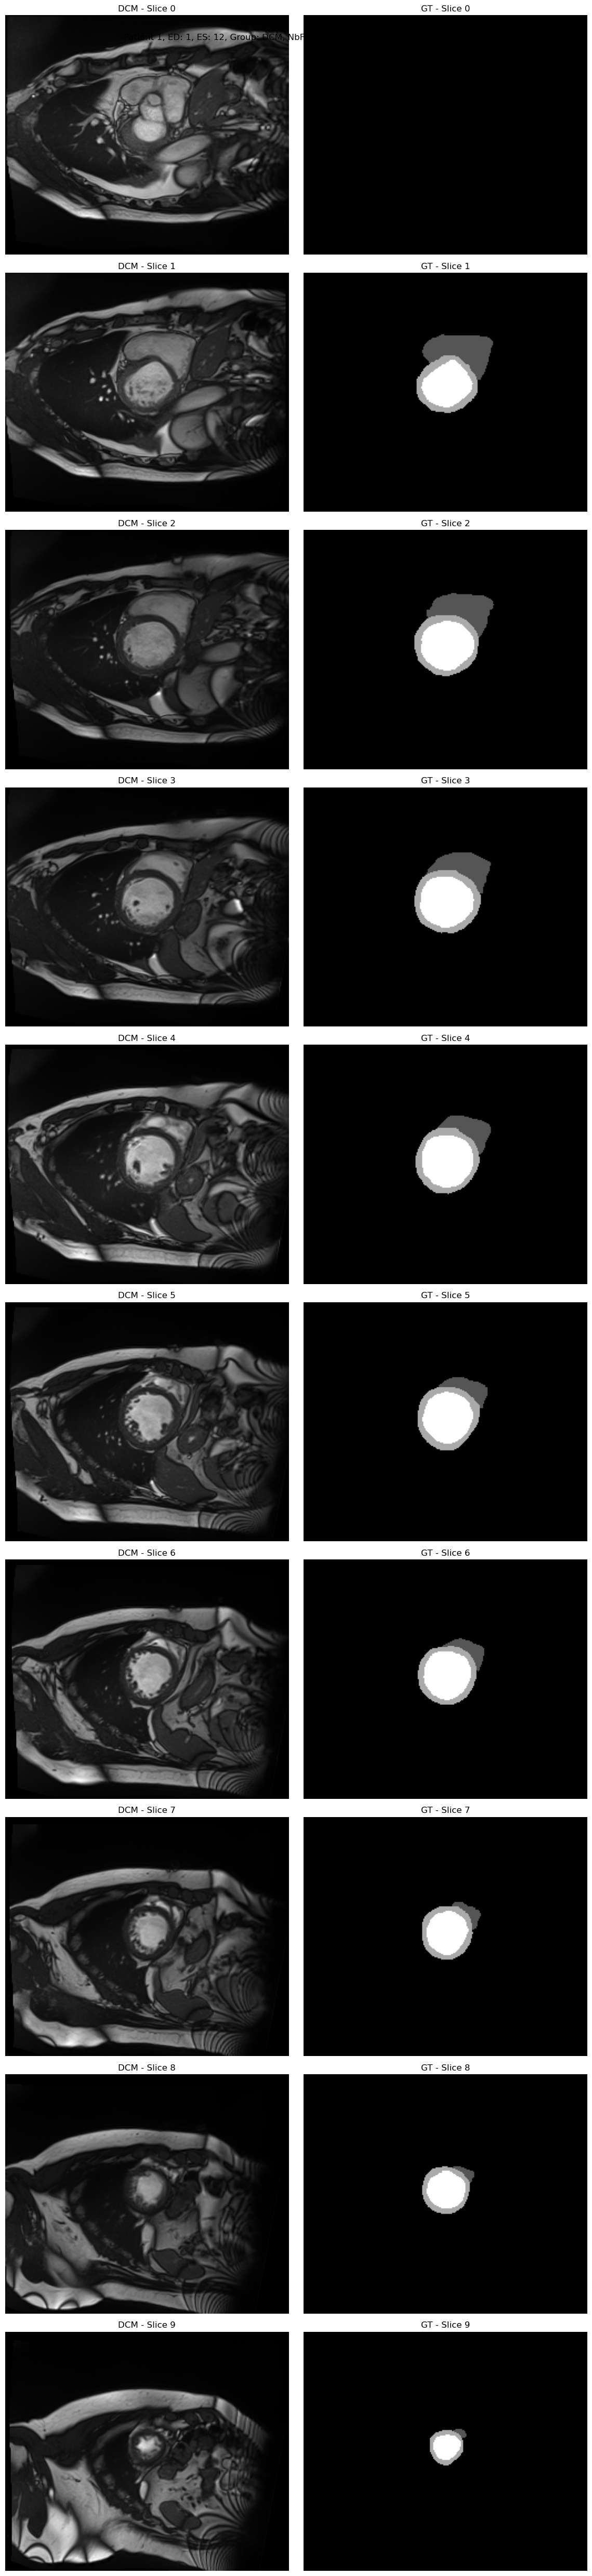

In [6]:
# DCM patient
patient_cfg = configparser.ConfigParser()
patient_cfg.read_string('[Info]\n' + open('./data/training/patient001/info.cfg').read())

ed = patient_cfg.get('Info', 'ED')
es = patient_cfg.get('Info', 'ES')
group = patient_cfg.get('Info', 'Group')
nbFrame = patient_cfg.get('Info', 'NbFrame')
height = patient_cfg.get('Info', 'Height')
weight = patient_cfg.get('Info', 'Weight')

nii_file_path1 = "./data/training/patient001/patient001_frame01.nii.gz"
nii_file_path2 = "./data/training/patient001/patient001_frame01_gt.nii.gz"

nii_img1 = nib.load(nii_file_path1)
nii_data1 = nii_img1.get_fdata()

nii_img2 = nib.load(nii_file_path2)
nii_data2 = nii_img2.get_fdata()

# Display slices of both NIfTI images side by side using matplotlib
num_slices = nii_data1.shape[2]


plt.figure(figsize=(12, 5 * num_slices))

for slice_idx in range(num_slices):
    plt.subplot(num_slices, 2, 2*slice_idx + 1)
    plt.imshow(nii_data1[:, :, slice_idx], cmap="gray")
    plt.title(f"DCM - Slice {slice_idx}")
    plt.axis("off")

    plt.subplot(num_slices, 2, 2*slice_idx + 2)
    plt.imshow(nii_data2[:, :, slice_idx], cmap="gray")
    plt.title(f"GT - Slice {slice_idx}")
    plt.axis("off")

title = f"Patient 1, ED: {ed}, ES: {es}, Group: {group}, NbFrame: {nbFrame}, Height: {height}, Weight: {weight}"
plt.suptitle(title)
plt.tight_layout()
plt.show()
